In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Загрузка данных

In [ ]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [ ]:
data = pd.read_excel('data/data_ford_price.xlsx') 

#  Отбор признаков: мотивация

Отбор признаков — это процесс выбора важных признаков, оказывающих наибольшее влияние на предсказание.

A Верно. Уменьшение мультиколлинеарности ведёт к снижению зашумлённости данных, что благотворно влияет на результат.

B Верно. Уменьшение размерности выборки положительно влияет на скорость обучения модели.

C Верно. Отбор признаков потенциально может привести к повышению качества прогнозирования благодаря избавлению от зашумлённости в данных.


Верно:Действительно, лучше оставить тот признак, который легче будет использовать в дальнейшем.

## Предобработка данных

Давайте оценим влияние мультиколлинеарности на линейную регрессию:

In [ ]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [ ]:
x.drop('lat', axis = 1, inplace = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

Мы выяснили, что у нас присутствует сильная зависимость между lat и weather. Удалим lat, так как этот признак, в отличие от weather, необходимо округлять.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

Методы отбора признаков предназначены для уменьшения количества входных переменных до тех значений, которые наиболее полезны для предсказательной способности модели.

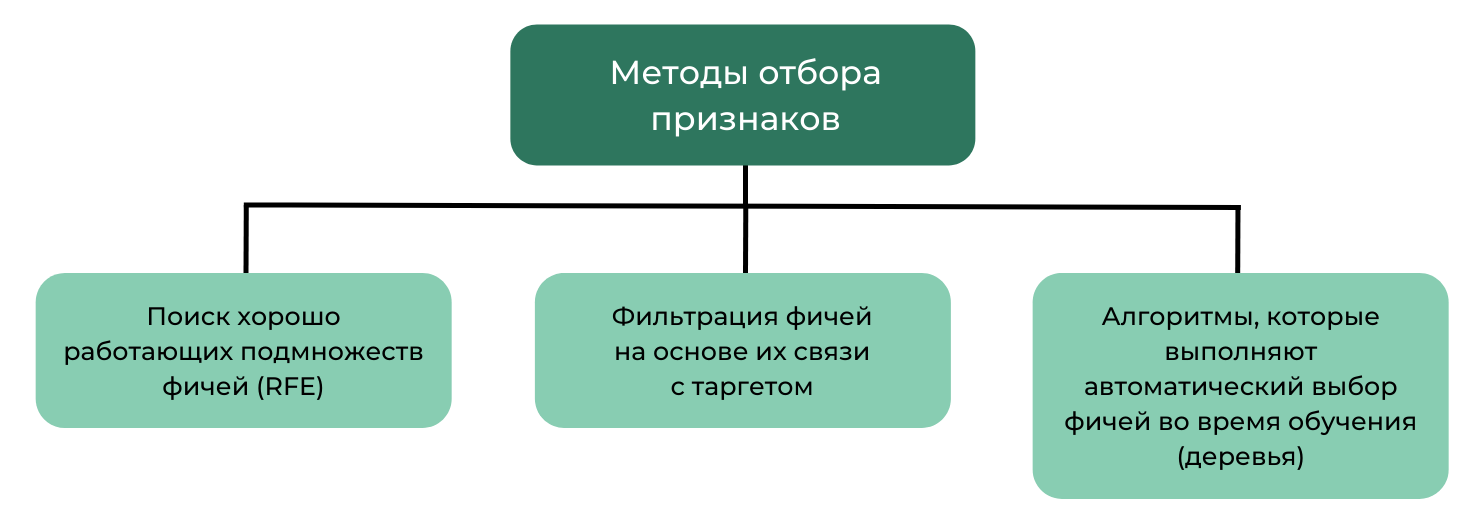

## Метод рекурсивного исключения признаков

Метод рекурсивного исключения признаков (RFE) предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала RFE обучается на изначальной выборке и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

Выделим три наиболее значимых признака:

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
y = data['price']
x = data.drop(columns='price')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

Также узнаем, как RFE проранжировал все доступные признаки:

In [ ]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [ ]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

odometer = 4 - наименее значимы признак

##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

В качестве фильтров для выбора признаков используются уже знакомые нам статистики, такие как коэффициент корреляции Пирсона, ANOVA и т. д. При этом выбор статистических показателей сильно зависит от типов переменных в данных.

Чем больше известно о типе данных, тем проще выбрать подходящую статистическую меру для метода отбора признаков на основе фильтра. Ниже приведена схема — помощник в выборе метода селекции признаков.

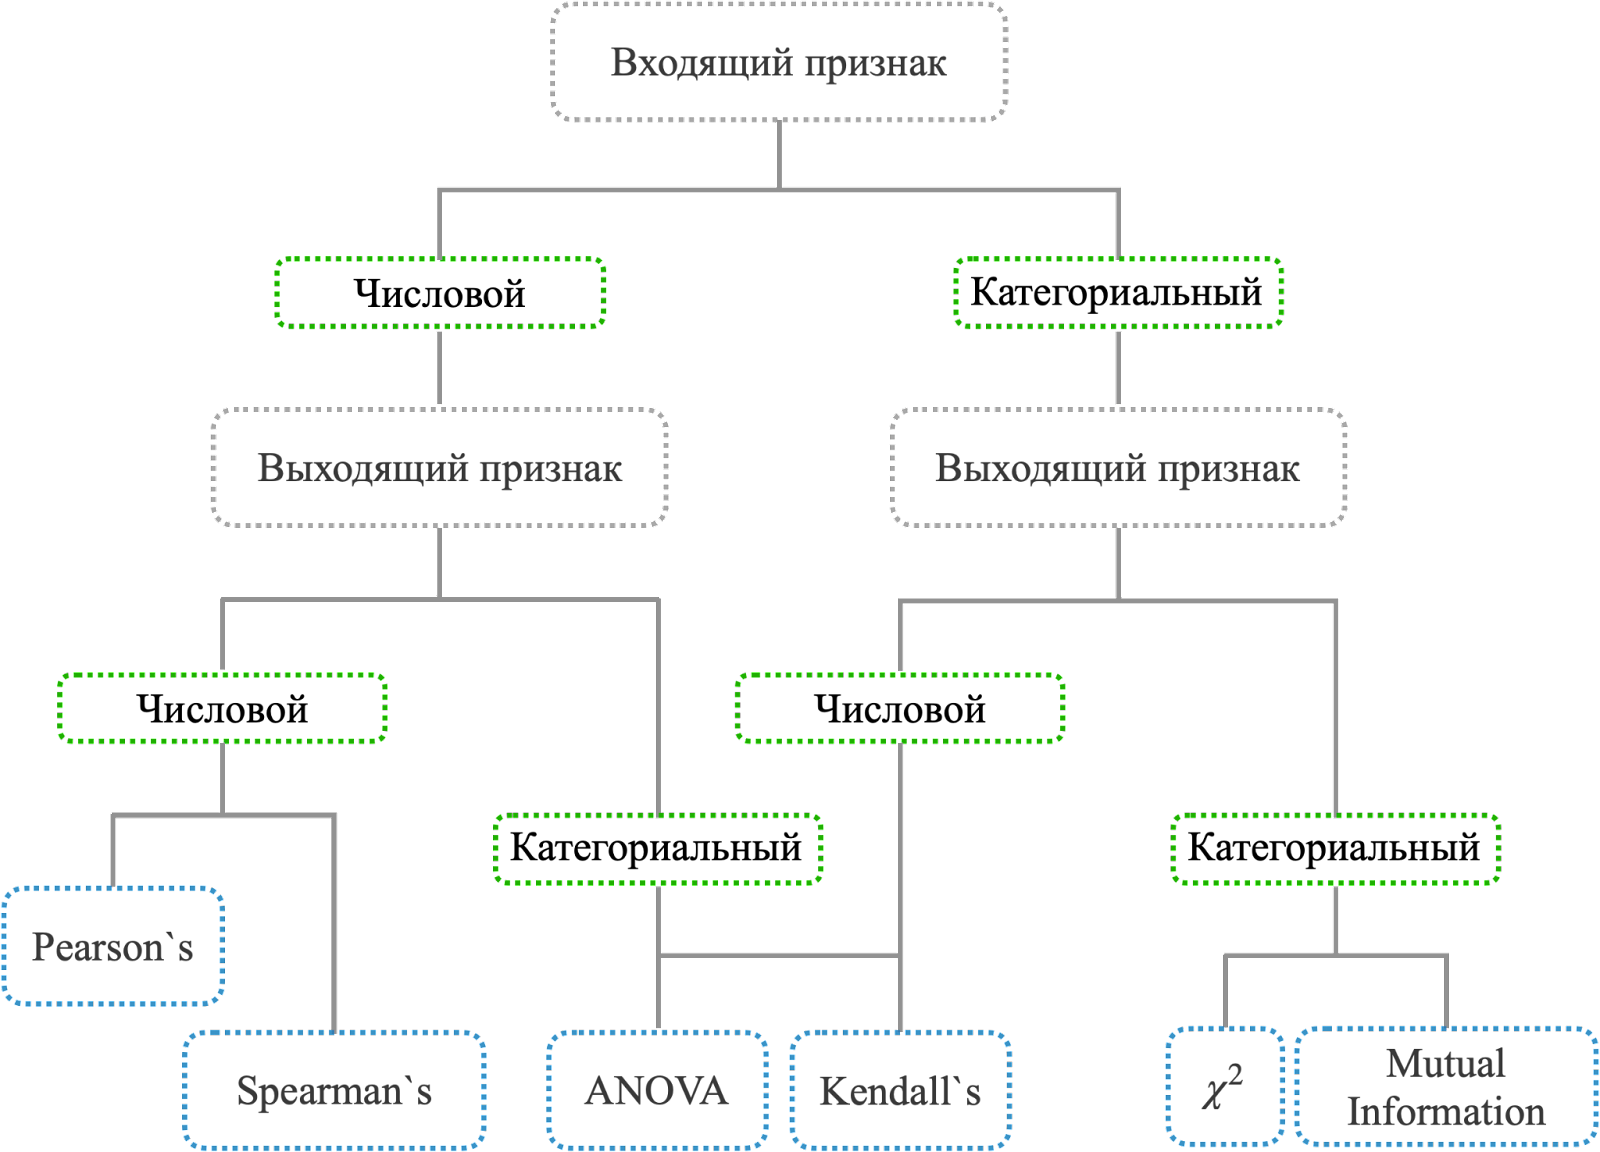

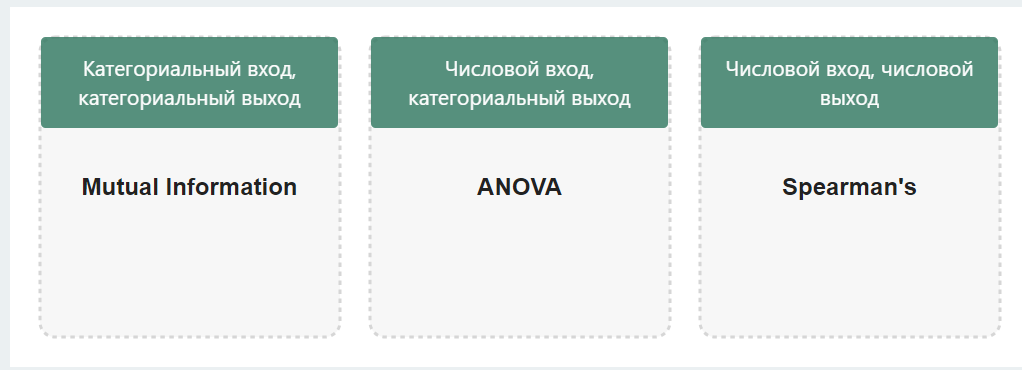

Библиотека sklearn обеспечивает реализацию большинства полезных статистических показателей, например:

* коэффициента корреляции Пирсона: [f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html);
* дисперсионного анализа ANOVA: [f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html);
* хи-квадрата: [chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html);
* взаимной информации: [mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) и [mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html).

Кроме того, библиотека SciPy обеспечивает реализацию многих других статистических данных, таких как тау Кендалла ([kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)) и ранговая корреляция Спирмена ([spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)).

sklearn также предоставляет множество различных методов фильтрации после расчёта статистики для каждой входной переменной с целевой.

Два наиболее популярных метода:

* выбор k лучших переменных: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html);
* выбор переменных верхнего процентиля: [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html).

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

На этот раз odometer оказался в топе.

9.4 Как необходимо дополнить код, чтобы выполнить отбор признаков с помощью ANOVA F-measure?

selector = SelectKBest(___?___, k=3)

Впишите недостающую часть в поле ниже.

f_classif